Delkhaz Ibrahimi

CSCI 4850/5850

OPEN LAB 1


2/15/18 11:00 PM

In [0]:
import os
import pandas
import numpy as np
import keras

iris_data = os.path.join("data","iris-data.txt")

data = np.array(pandas.read_table(iris_data,
                                     delim_whitespace=True,
                                header=None))
print(data.shape)


(150, 5)


#   Learning / Walking Through Assignment Tut
    *   will comment out this portion of code, but this is bassically me going through the ola learning all the components

In [0]:
########## Slice
    #slice the first 3 examples

#data[0:3,:]
        # :operator to specify list of rows that we would like to extract from the matrix
        #useful when exploring large data sets or forming new arrays from subset of other arrays.
    
    
    
    #for this data set each ex consit of vector of four features, and a classs label(five total).
    #each four features value are continous and class labels are discrete.
    #use unique() to explore the data

    #looking at only last column - find its discrete set of items that it contains 

#np.unique(data[:,4])
    #lets look at other columns, first minimum and next maximum 

#print(np.min(data[:,0:4],axis=0))
#print(np.max(data[:,0:4],axis=0))

    #unique() allows us to see discrete ranges of values in an array
    #5th column is class label - 3 diff species of iris rep by 0,1,2
    
    

#   Building a Single-Layer Network

In [0]:
    #INPUT TRAINING VECTOR
X = data[:,0:4]
X.shape
### NOTE::
#   X now contains all the features of the 150 flowers 
#   we are going to try to classify using our neural net

    #TRANFORM CLASS LABELS
labels = data[:,4]
#   first load tools then create set of target vectors, 
#   which we will be using for training classifier 

    #CONVERTING INT CLASS LABELS TO CATEGORICAL /"ONE HOT" ENCODING
Y = keras.utils.to_categorical(labels,
                                len(np.unique(labels)))
    #ENCODING VECTOR size ???? 
print(Y.shape)
    #explaintion below 
#   the integer class labels have been encoded into a 3 dimensional
#   vector space, unique() was used to determind number
#   of unique integer labels in the vector, and the vector itself 
#   gets passed to_categorical() to produce encoding.

(150, 3)


In [0]:
##  ONE HOT encoding scheme illustration 

#print(labels[0])
#print(Y[0,:])
#print(labels[50])
#print(Y[50,:])
#print(labels[100])
#print(Y[100,:])

#one hot encoding ^


In [0]:
# Building SINGLE LAYER NETWORK BEGINS HERE !! : 

In [0]:
    #setting up single layer network
model = keras.Sequential()
#   Sequential makes an assumption that we like to build forward neural network architecture
#   focus now on just Dense() connected networks, where all units in previous layer will be connected to all units in the layer we are creating.

    #INPUT SIZE - 4
input_size = X.shape[1]

    #OUTPUT SIZE - 3
output_size = Y.shape[1]

    #SIGMOID ACTIVATION FUNCTION
model.add(keras.layers.Dense(output_size,
                             activation='sigmoid',
                             input_shape=[input_size]))

    #use summary to get glimpse into what keras tools have created.
model.summary()

    #PREP MODEL FOR TRAINING                LEARNING RATE 
model.compile(loss=keras.losses.mse,
             optimizer=keras.optimizers.SGD(lr=0.072),
             metrics=['accuracy'])
#   stochastic gradient descent for specifying how to update
#   weights via experiances with training data

    #examine bias and connection weights 
model.get_weights()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


[array([[-0.4885475 ,  0.75811338,  0.77747607],
        [ 0.53868675,  0.06529254,  0.68955314],
        [ 0.319839  ,  0.44028759,  0.05119628],
        [ 0.08321643,  0.58882701,  0.42511618]], dtype=float32),
 array([ 0.,  0.,  0.], dtype=float32)]

#   Training a Single-Layer Network

In [0]:
    #TRAINING PARAMATERS
batch_size = 16
epochs = 1200
validation_split = 0.5

    #training the model and record the training history for later examination 
history = model.fit(X,Y,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 0,
                   validation_split = validation_split)



In [0]:
#######. WANT TO MAKE NETWORK BETTER ########
#1) Increase the number epochs used in the training process 
#2) Increase the learning rate on the stochastic gradient optimizer 
#3) Rebuild the network starting from our model = keras.Sequential() statement to initialize the weights at a
# better starting location in the weight space. 
#3) Other things that we will explore at a later time (don't use any other tricks for this assignment)...

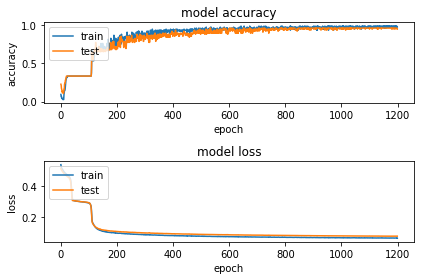

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [0]:
#Test nework preformance on entire data set, now that we have trained, we can use evalute() to determine this
score = model.evaluate(X,Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

150/150 [==============================] - 0s 56us/step
Test loss: 0.0744885169466
Test accuracy: 0.953333330949


#   Wisconsin (Diagnostic) Breast Cancer data set

In [0]:
import os
import pandas
import numpy as np
import keras

WDBC = os.path.join("data","WDBC.txt")

data = np.array(pandas.read_table(WDBC,
                                delim_whitespace=True,
                                header=None))
print(data.shape)


(568, 31)


#   Building a Single-Layer Network

In [0]:
    #INPUT TRAINING VECTOR
X = data[:,0:30]
X.shape
#   30 diff dimensions !!
    #TRANSFORM CLASS LABELS 
labels = data[:,30]

Y = keras.utils.to_categorical(labels,
                                len(np.unique(labels)))
print(Y.shape)

    #BUILDING A SINGLE LAYER NETWORK
model = keras.Sequential()

input_size = X.shape[1]
output_size = Y.shape[1]
                                        #SIGMOID 
model.add(keras.layers.Dense(output_size,
                             activation='sigmoid',
                             input_shape=[input_size]))

model.summary()
                            # MSE , SGD and learning rate.
model.compile(loss=keras.losses.mse,
             optimizer=keras.optimizers.SGD(lr=0.07),
             metrics=['accuracy'])

model.get_weights()


(568, 2)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


[array([[-0.28464669, -0.31180218],
        [-0.01153234,  0.19502959],
        [-0.19403902,  0.14228001],
        [-0.19976687, -0.07107595],
        [ 0.40498689, -0.24963994],
        [ 0.33524916,  0.2765449 ],
        [-0.04665646, -0.02679455],
        [ 0.06512424, -0.39042732],
        [-0.2665416 , -0.11306512],
        [ 0.14497307, -0.07982764],
        [ 0.18522713,  0.04048643],
        [-0.14627138, -0.40260893],
        [ 0.05888617, -0.09491697],
        [-0.21580257,  0.31129178],
        [ 0.03575957, -0.13000673],
        [-0.41628313,  0.4258202 ],
        [-0.28922573,  0.17918518],
        [-0.08721539, -0.01655218],
        [-0.28284085,  0.07168618],
        [-0.20919181,  0.19868001],
        [ 0.21351668, -0.32240808],
        [ 0.13085005, -0.1288549 ],
        [-0.42598361,  0.16136774],
        [-0.42224628,  0.32402548],
        [-0.05962628, -0.06792045],
        [-0.28384846,  0.17126343],
        [-0.10285556,  0.09531781],
        [-0.11307573, -0.387

#   Training a Single-Layer Network

In [0]:
    #keeping this same as before, but playing with epochs
batch_size = 16
epochs = 1000
validation_split = 0.5

#training the model and record the training history for later examination 
history = model.fit(X,Y,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 0,
                   validation_split = validation_split)

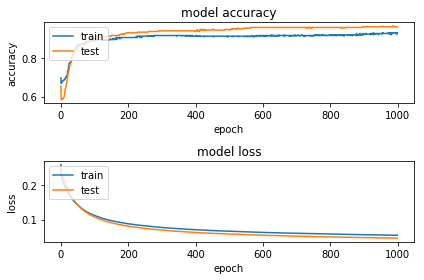

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [0]:
#Test nework preformance on entire data set, now that we have trained, we can use evalute() to determine this
score = model.evaluate(X,Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

568/568 [==============================] - 0s 38us/step
Test loss: 0.0498495556834
Test accuracy: 0.948943661132
